##Business Case: Delhivery - Feature Engineering

D A Santhosh

Loading the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Load the dataset
file_path = '/content/delhivery_data.csv'
# Change this to your actual file path
data = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

 Handling Missing Values and Convert Timestamps

In [ ]:
# Handle missing values by filling them with a placeholder
data['source_name'].fillna('Unknown', inplace=True)
data['destination_name'].fillna('Unknown', inplace=True)


In [ ]:
# Convert timestamp columns to datetime, handling errors
data['trip_creation_time'] = pd.to_datetime(data['trip_creation_time'])
data['od_start_time'] = pd.to_datetime(data['od_start_time'])
data['od_end_time'] = pd.to_datetime(data['od_end_time'])
data['cutoff_timestamp'] = pd.to_datetime(data['cutoff_timestamp'], errors='coerce')

In [ ]:
# Extract features from timestamps
data['trip_creation_year'] = data['trip_creation_time'].dt.year
data['trip_creation_month'] = data['trip_creation_time'].dt.month
data['trip_creation_day'] = data['trip_creation_time'].dt.day
data['trip_creation_hour'] = data['trip_creation_time'].dt.hour
data['trip_creation_minute'] = data['trip_creation_time'].dt.minute
data['trip_creation_second'] = data['trip_creation_time'].dt.second

In [ ]:
data['od_start_year'] = data['od_start_time'].dt.year
data['od_start_month'] = data['od_start_time'].dt.month
data['od_start_day'] = data['od_start_time'].dt.day
data['od_start_hour'] = data['od_start_time'].dt.hour
data['od_start_minute'] = data['od_start_time'].dt.minute
data['od_start_second'] = data['od_start_time'].dt.second

In [ ]:
data['od_end_year'] = data['od_end_time'].dt.year
data['od_end_month'] = data['od_end_time'].dt.month
data['od_end_day'] = data['od_end_time'].dt.day
data['od_end_hour'] = data['od_end_time'].dt.hour
data['od_end_minute'] = data['od_end_time'].dt.minute
data['od_end_second'] = data['od_end_time'].dt.second

In [ ]:
# Extract location information from source and destination names
data[['source_city', 'source_state']] = data['source_name'].str.extract(r'([^_]+)_.+\(([^)]+)\)')
data[['destination_city', 'destination_state']] = data['destination_name'].str.extract(r'([^_]+)_.+\(([^)]+)\)')


In [ ]:
# Display the first few rows to verify the changes
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,od_end_year,od_end_month,od_end_day,od_end_hour,od_end_minute,od_end_second,source_city,source_state,destination_city,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,20,4,47,45,Anand,Gujarat,Khambhat,Gujarat
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,20,4,47,45,Anand,Gujarat,Khambhat,Gujarat
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,20,4,47,45,Anand,Gujarat,Khambhat,Gujarat
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,20,4,47,45,Anand,Gujarat,Khambhat,Gujarat
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018,9,20,4,47,45,Anand,Gujarat,Khambhat,Gujarat


Aggregation and Merging

In [ ]:
# Group by trip_uuid, source_center, and destination_center
aggregated_data = data.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({
    'trip_creation_time': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_name': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'factor': 'mean',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_factor': 'mean',
    'source_state': 'first',  # Include source_state in the aggregation
    'destination_state': 'first'  # Include destination_state in the aggregation
}).reset_index()

# Display the first few rows of the aggregated data
aggregated_data.head()

,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,route_type,source_name,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,source_state,destination_state
0,trip-153671041653548748,IND209304AAA,IND000000ACB,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,...,6484.0,3464.0,4540.1261,1.741964,728.0,534.0,670.6205,1.893007,Uttar Pradesh,Haryana
1,trip-153671041653548748,IND462022AAA,IND209304AAA,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,...,9198.0,4323.0,6037.6386,2.150702,820.0,474.0,649.8528,2.134213,Madhya Pradesh,Uttar Pradesh
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,...,96.0,55.0,60.3157,1.746424,46.0,26.0,28.1995,1.795767,Karnataka,Karnataka
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,...,303.0,155.0,209.1151,1.875977,95.0,39.0,55.9899,2.912963,Karnataka,Karnataka
4,trip-153671043369099517,IND000000ACB,IND160002AAC,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,...,2601.0,1427.0,1975.7409,1.737898,608.0,231.0,317.7408,2.326577,Haryana,Punjab


Exploratory Data Analysis (EDA)

In [ ]:
# Set up the matplotlib figure aesthetics
sns.set(style="whitegrid")

# Univariate analysis for numerical variables
numerical_columns = [
    'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
    'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
    'segment_osrm_distance'
]



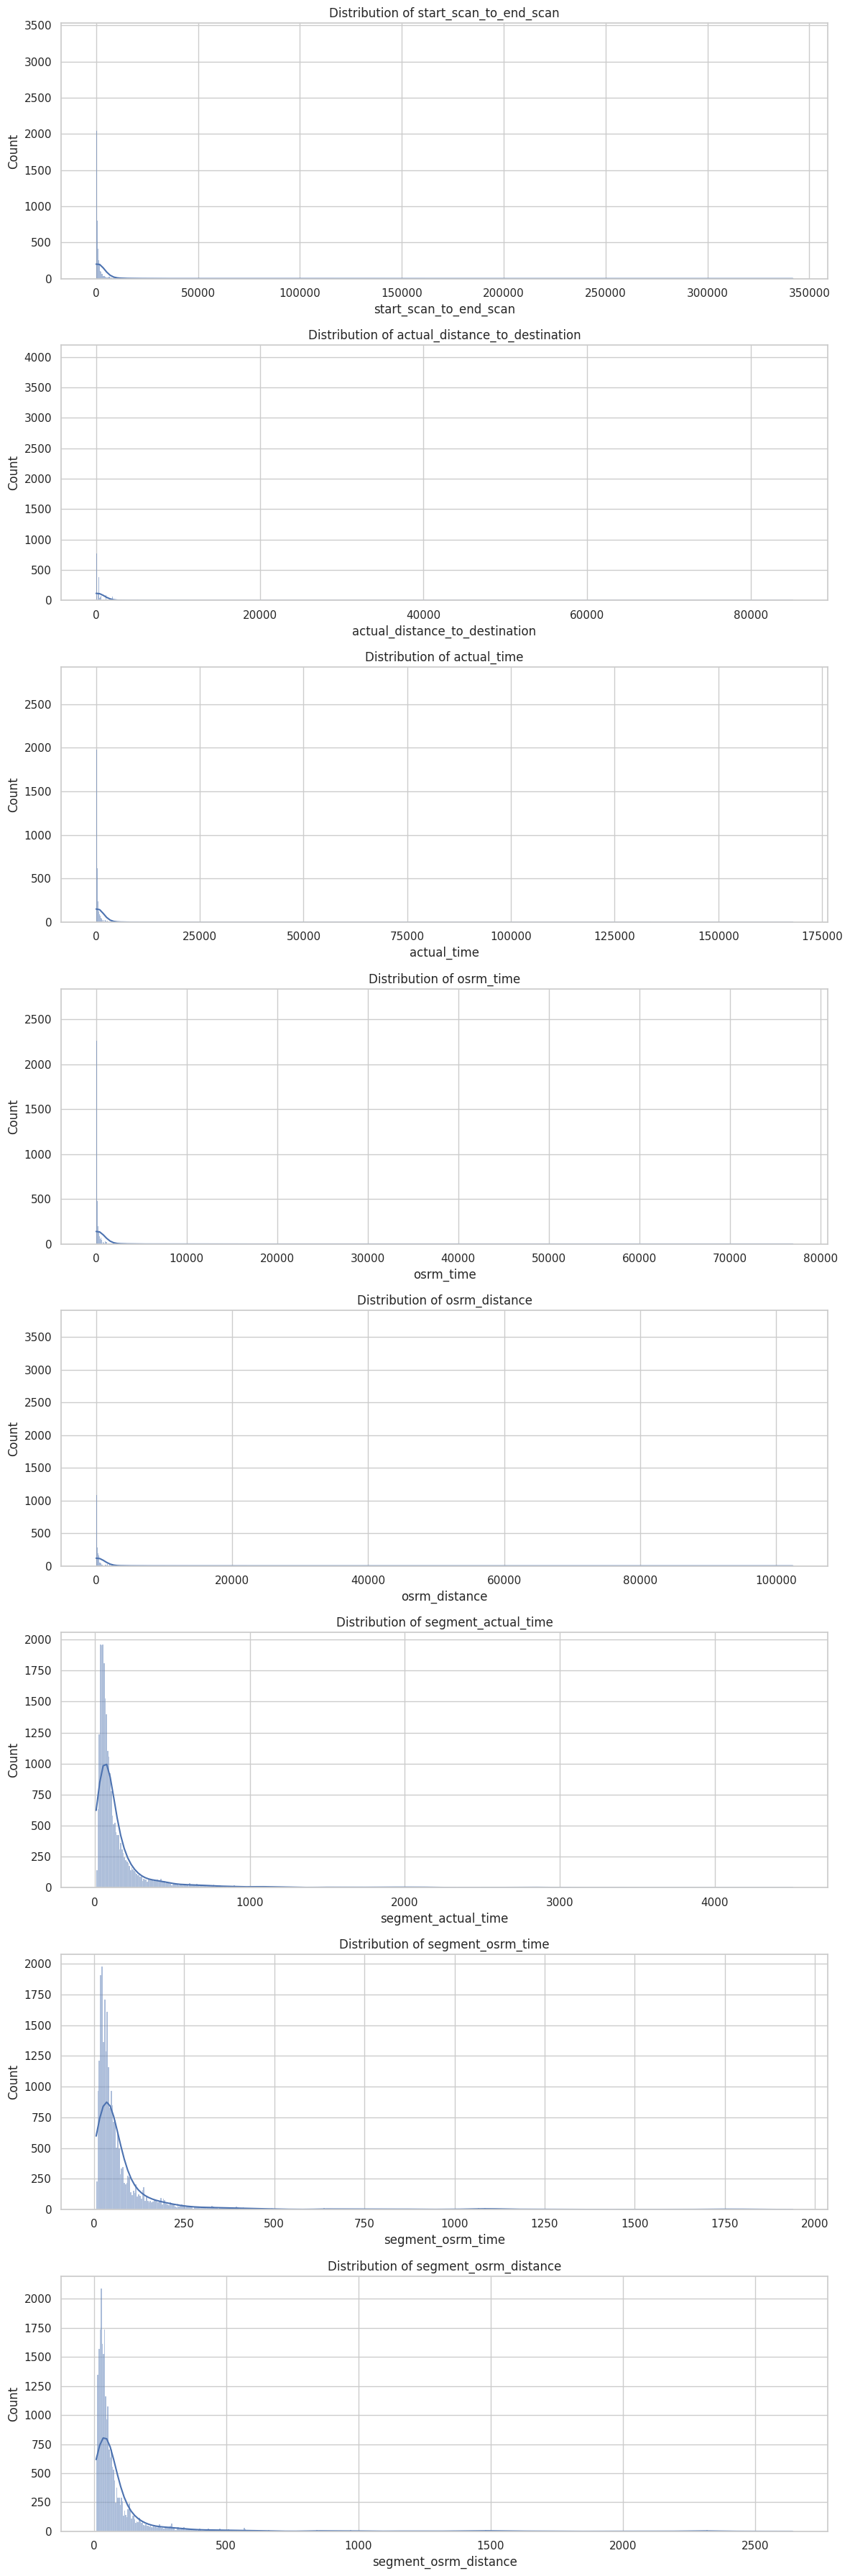

In [ ]:
# Plot histograms for numerical columns
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, 36))
for ax, col in zip(axes, numerical_columns):
    sns.histplot(aggregated_data[col].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


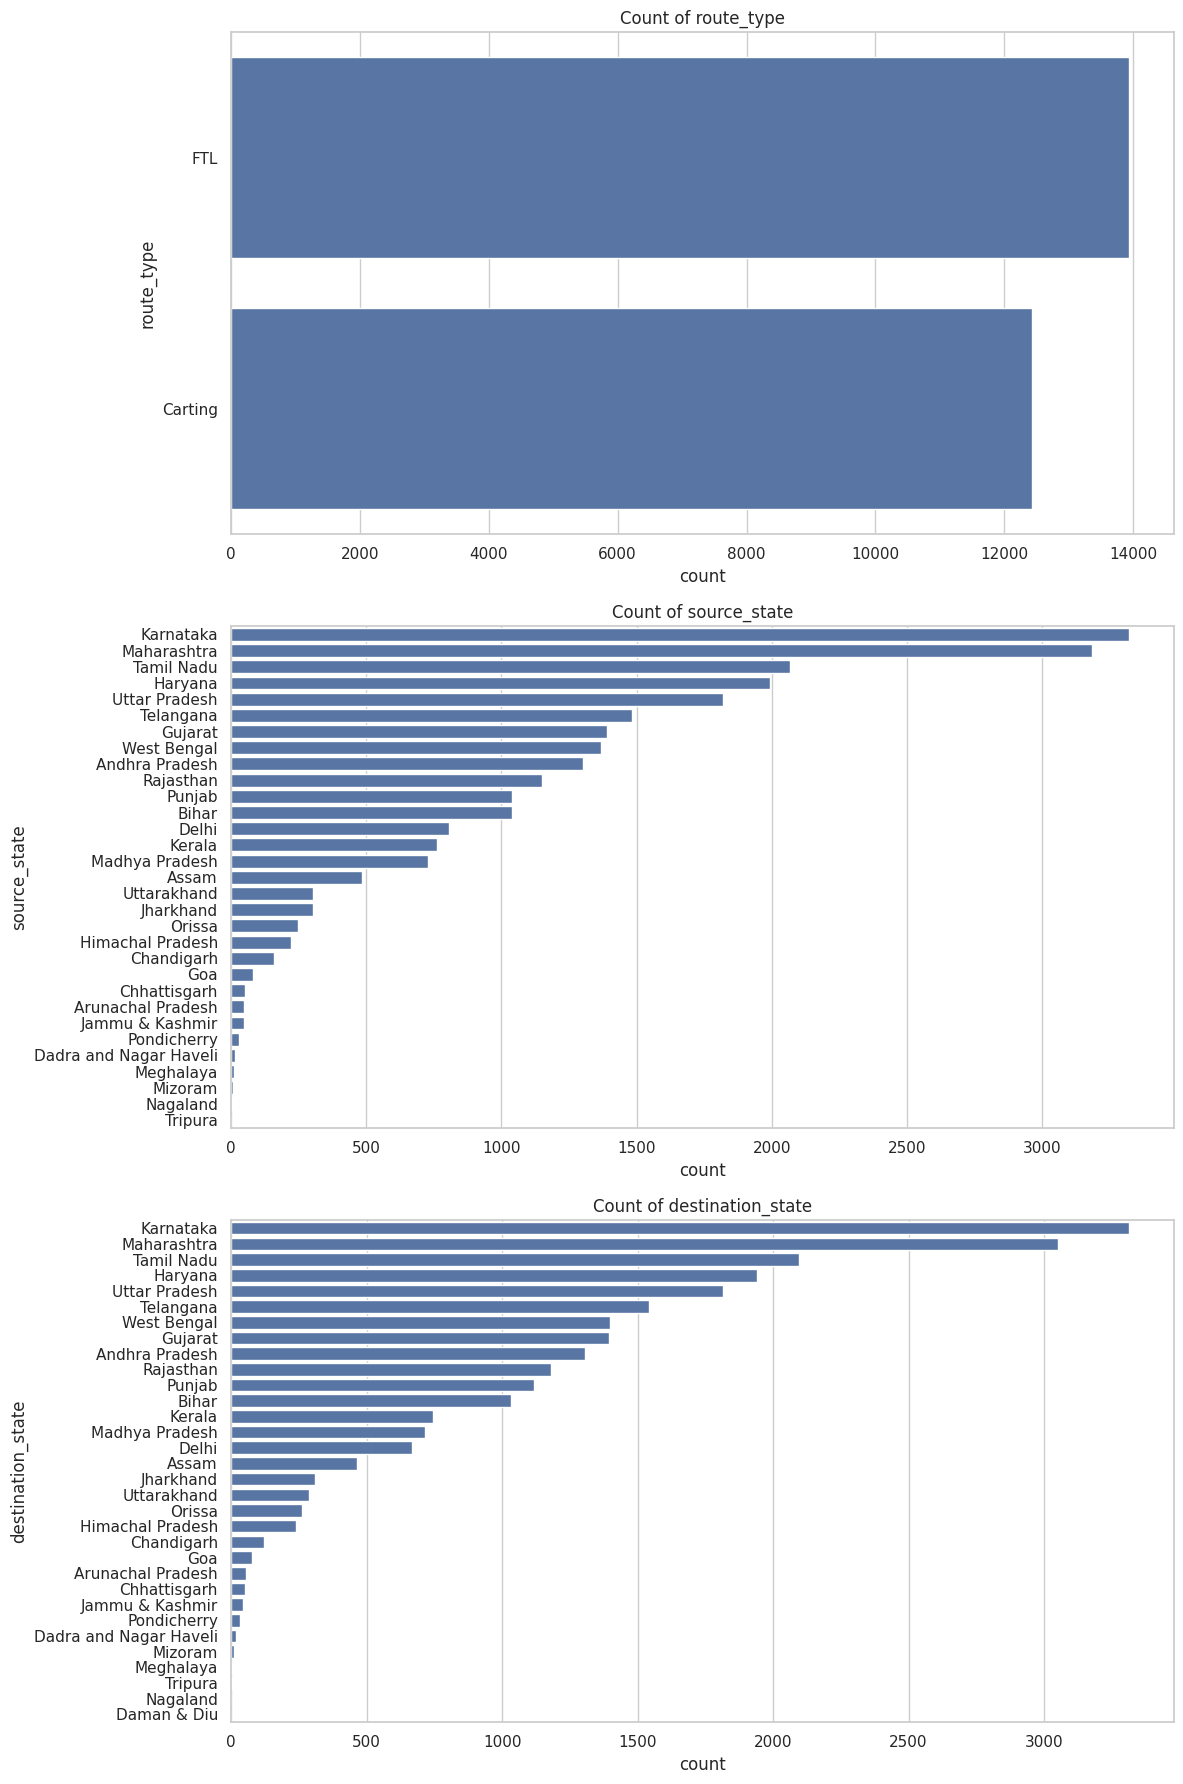

In [ ]:
# Univariate analysis for categorical variables
categorical_columns = ['route_type', 'source_state', 'destination_state']

# Plot countplots for categorical columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(12, 18))
for ax, col in zip(axes, categorical_columns):
    sns.countplot(data=aggregated_data, y=col, order=aggregated_data[col].value_counts().index, ax=ax)
    ax.set_title(f'Count of {col}')
plt.tight_layout()
plt.show()

Hypothesis Testing and Visual Analysis

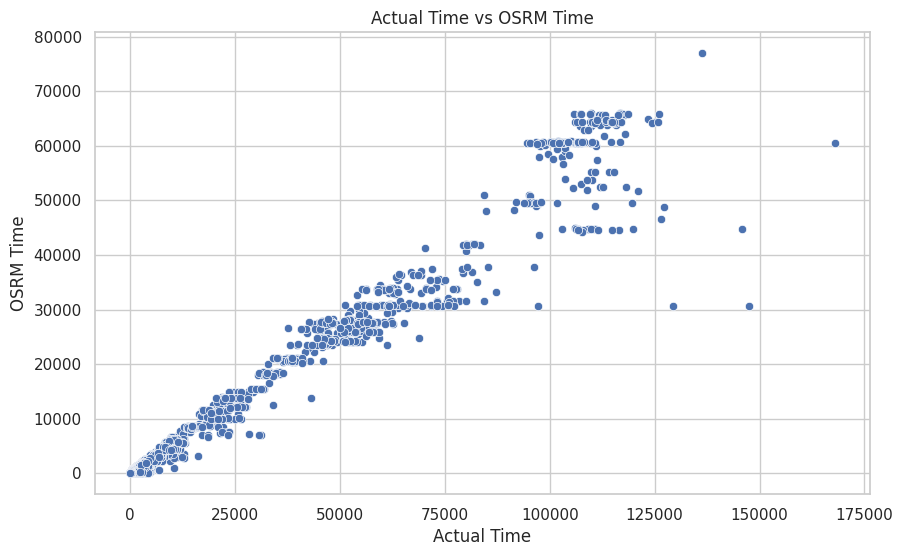

T-statistic: 33.05610864906825, P-value: 7.904151560985772e-235


In [ ]:
# Hypothesis testing and visual analysis
# Example: Compare actual_time and osrm_time


# Scatter plot to compare actual_time and osrm_time
plt.figure(figsize=(10, 6))
sns.scatterplot(x=aggregated_data['actual_time'], y=aggregated_data['osrm_time'])
plt.title('Actual Time vs OSRM Time')
plt.xlabel('Actual Time')
plt.ylabel('OSRM Time')
plt.show()

# Perform hypothesis testing (paired t-test)
t_stat, p_value = stats.ttest_rel(aggregated_data['actual_time'], aggregated_data['osrm_time'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')


Outlier Detection and Handling

In [ ]:
# Identify and handle outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to numerical columns
for col in numerical_columns:
    aggregated_data = remove_outliers(aggregated_data, col)

# Display the dataset after outlier removal
aggregated_data.describe()


,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,17103,17103,17103,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000,17103.000000
mean,2018-09-22 19:01:17.842078464,2018-09-22 22:05:27.023269632,2018-09-23 00:21:43.344737792,376.892943,61.976152,134.144653,68.072794,76.496865,2.149314,64.658481,32.558674,36.503538,2.242800
min,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 00:50:10.814399,22.000000,9.001351,9.000000,6.000000,9.072900,0.407895,9.000000,6.000000,9.072900,-0.227273
25%,2018-09-17 13:12:52.009181440,2018-09-17 16:03:30.969369600,2018-09-17 19:11:17.876992512,152.000000,25.727122,72.000000,34.000000,34.817450,1.523185,42.000000,21.000000,23.791150,1.455556
50%,2018-09-22 15:16:26.623631104,2018-09-22 17:09:26.963151872,2018-09-22 20:19:18.454433024,267.000000,51.727305,112.000000,58.000000,65.068500,1.891234,59.000000,30.000000,33.908400,1.895673
75%,2018-09-27 23:28:49.024899072,2018-09-28 03:19:34.660721920,2018-09-28 04:51:38.700667904,480.000000,86.554789,179.000000,94.000000,105.477850,2.444444,82.000000,42.000000,46.646700,2.545357
max,2018-10-03 23:59:42.701692,2018-10-05 01:01:19.051758,2018-10-05 02:44:50.858859,2855.000000,217.777567,480.000000,217.000000,237.200200,18.125000,160.000000,81.000000,84.238300,60.961538
std,NaN,NaN,NaN,343.274771,40.424156,83.471829,42.652872,47.597858,1.073531,30.373179,15.015485,16.465765,1.800315


Categorical Encoding

In [ ]:
# Perform one-hot encoding for categorical variables
encoded_data = pd.get_dummies(aggregated_data, columns=['route_type', 'source_state', 'destination_state'])

# Display the first few rows of the encoded data
encoded_data.head()


,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_state_Mizoram,destination_state_Orissa,destination_state_Pondicherry,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,174.0,...,False,False,False,False,False,False,False,False,False,False
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,732.0,...,False,False,False,False,False,False,False,False,False,False
6,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,200.0,...,False,False,False,False,False,False,False,False,False,False
7,trip-153671052974046625,IND583101AAA,IND583201AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,456.0,...,False,False,False,False,False,False,False,False,False,False
8,trip-153671052974046625,IND583119AAA,IND583101AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,970.0,...,False,False,False,False,False,False,False,False,False,False


Normalization/Standardization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize/Standardize numerical features
scaler = MinMaxScaler()  # or StandardScaler()
scaled_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
                  'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
                  'segment_osrm_distance']

encoded_data[scaled_columns] = scaler.fit_transform(encoded_data[scaled_columns])

# Display the dataset after scaling
encoded_data.head()


,trip_uuid,source_center,destination_center,trip_creation_time,route_schedule_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,destination_state_Mizoram,destination_state_Orissa,destination_state_Pondicherry,destination_state_Punjab,destination_state_Rajasthan,destination_state_Tamil Nadu,destination_state_Telangana,destination_state_Uttar Pradesh,destination_state_Uttarakhand,destination_state_West Bengal
2,trip-153671042288605164,IND561203AAB,IND562101AAA,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,0.053653,...,False,False,False,False,False,False,False,False,False,False
3,trip-153671042288605164,IND572101AAA,IND561203AAB,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,0.250618,...,False,False,False,False,False,False,False,False,False,False
6,trip-153671046011330457,IND400072AAB,IND401104AAA,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,0.062831,...,False,False,False,False,False,False,False,False,False,False
7,trip-153671052974046625,IND583101AAA,IND583201AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 02:34:10.515593,0.153194,...,False,False,False,False,False,False,False,False,False,False
8,trip-153671052974046625,IND583119AAA,IND583101AAA,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 03:54:43.114421,2018-09-12 12:00:30.683231,0.334628,...,False,False,False,False,False,False,False,False,False,False


 Business Insights and Recommendations

In [ ]:
# Extract business insights and make recommendations
# Example: Check from where most orders are coming from (State)

# Most orders by source state
# Get a list of columns representing source states
source_state_columns = [col for col in encoded_data.columns if 'source_state_' in col]

# Calculate the sum of each source state column to find the most frequent
most_orders_source = encoded_data[source_state_columns].sum().idxmax()
print(f'Most orders come from the source state: {most_orders_source}')

# Busiest corridor
# Check if 'source_city' and 'destination_city' columns exist
if 'source_city' in encoded_data.columns and 'destination_city' in encoded_data.columns:
    busiest_corridor = encoded_data.groupby(['source_city', 'destination_city']).size().idxmax()
    print(f'Busiest corridor: {busiest_corridor}')

    # Average distance and time for the busiest corridor
    avg_distance = encoded_data[(encoded_data['source_city'] == busiest_corridor[0]) &
                                (encoded_data['destination_city'] == busiest_corridor[1])]['actual_distance_to_destination'].mean()
    avg_time = encoded_data[(encoded_data['source_city'] == busiest_corridor[0]) &
                            (encoded_data['destination_city'] == busiest_corridor[1])]['actual_time'].mean()
    print(f'Average distance for the busiest corridor: {avg_distance}')
    print(f'Average time for the busiest corridor: {avg_time}')
else:
    print("Error: 'source_city' or 'destination_city' column not found in the dataset.")

# Recommendations
print("Recommendations:")
print("1. Focus on optimizing routes in the busiest corridor to reduce delivery time.")
print("2. Analyze the source state with the most orders to understand and enhance operations there.")
print("3. Regularly monitor and address outliers in delivery times and distances to ensure consistent service quality.")

Most orders come from the source state: source_state_Karnataka
Error: 'source_city' or 'destination_city' column not found in the dataset.
Recommendations:
1. Focus on optimizing routes in the busiest corridor to reduce delivery time.
2. Analyze the source state with the most orders to understand and enhance operations there.
3. Regularly monitor and address outliers in delivery times and distances to ensure consistent service quality.
